In [1]:
import requests 
import json

In [2]:
api_key = '27ae1dd809036202bcf78ee64609eb76'
company = "MSFT"
years = 5

In [3]:
r = requests.get(f'https://financialmodelingprep.com/api/v3/income-statement/{company}?limit={years}&apikey={api_key}')
data = r.json()
print(data)

[{'date': '2021-06-30', 'symbol': 'MSFT', 'reportedCurrency': 'USD', 'cik': '0000789019', 'fillingDate': '2021-07-29', 'acceptedDate': '2021-07-29', 'calendarYear': '2021', 'period': 'FY', 'revenue': 168088000000, 'costOfRevenue': 52232000000, 'grossProfit': 115856000000, 'grossProfitRatio': 0.689258007710247, 'researchAndDevelopmentExpenses': 20716000000, 'generalAndAdministrativeExpenses': 5107000000, 'sellingAndMarketingExpenses': 20117000000, 'sellingGeneralAndAdministrativeExpenses': 25224000000, 'otherExpenses': 0.0, 'operatingExpenses': 45940000000, 'costAndExpenses': 98172000000, 'interestIncome': 2131000000, 'interestExpense': 2346000000, 'depreciationAndAmortization': 11686000000, 'ebitda': 85134000000, 'ebitdaratio': 0.5064846984912664, 'operatingIncome': 69916000000, 'operatingIncomeRatio': 0.4230046166293846, 'totalOtherIncomeExpensesNet': -1186000000, 'incomeBeforeTax': 71102000000, 'incomeBeforeTaxRatio': 0.4230046166293846, 'incomeTaxExpense': 9831000000, 'netIncome': 6

In [4]:
import pandas as pd

In [5]:
df = pd.DataFrame(data)
df.info

<bound method DataFrame.info of          date symbol reportedCurrency         cik fillingDate  \
0  2021-06-30   MSFT              USD  0000789019  2021-07-29   
1  2020-06-30   MSFT              USD  0000789019  2020-07-30   
2  2019-06-30   MSFT              USD  0000789019  2019-08-01   
3  2018-06-30   MSFT              USD  0000789019  2018-08-03   
4  2017-06-30   MSFT              USD  0000789019  2017-08-02   

          acceptedDate calendarYear period       revenue  costOfRevenue  ...  \
0           2021-07-29         2021     FY  168088000000    52232000000  ...   
1  2020-07-30 20:44:46         2020     FY  143015000000    46078000000  ...   
2  2019-08-01 16:09:55         2019     FY  125843000000    42910000000  ...   
3  2018-08-03 11:03:33         2018     FY  110360000000    38353000000  ...   
4  2017-08-02 16:15:01         2017     FY   89950000000    34261000000  ...   

   incomeBeforeTaxRatio  incomeTaxExpense    netIncome  netIncomeRatio   eps  \
0              0

In [6]:
df = df.drop(columns=['reportedCurrency', 
                      'fillingDate', 
                      'acceptedDate', 
                      'period', 
                      'link', 
                      'finalLink', 
                      'symbol', 
                      'grossProfitRatio', 
                      'incomeBeforeTaxRatio', 
                      'netIncomeRatio', 
                      'eps', 
                      'epsdiluted',
                      'cik',
                      'date',
                      'operatingIncomeRatio'])

In [7]:
df = df.rename(columns = {'calendarYear': 'Year'}, inplace = False)

In [8]:
df

,Year,revenue,costOfRevenue,grossProfit,researchAndDevelopmentExpenses,generalAndAdministrativeExpenses,sellingAndMarketingExpenses,sellingGeneralAndAdministrativeExpenses,otherExpenses,operatingExpenses,...,depreciationAndAmortization,ebitda,ebitdaratio,operatingIncome,totalOtherIncomeExpensesNet,incomeBeforeTax,incomeTaxExpense,netIncome,weightedAverageShsOut,weightedAverageShsOutDil
0,2021,168088000000,52232000000,115856000000,20716000000,5107000000,20117000000,25224000000,0.0,45940000000,...,11686000000,85134000000,0.506485,69916000000,-1186000000,71102000000,9831000000,61271000000,7547000000,7608000000
1,2020,143015000000,46078000000,96937000000,19269000000,5111000000,19598000000,24709000000,0.0,43978000000,...,12796000000,68423000000,0.478432,52959000000,-77000000,53036000000,8755000000,44281000000,7610000000,7683000000
2,2019,125843000000,42910000000,82933000000,16876000000,4885000000,18213000000,23098000000,0.0,39974000000,...,11682000000,58056000000,0.461337,42959000000,-729000000,43688000000,4448000000,39240000000,7673000000,7753000000
3,2018,110360000000,38353000000,72007000000,14726000000,4754000000,17469000000,22223000000,0.0,36949000000,...,10261000000,49468000000,0.448242,35058000000,-1416000000,36474000000,19903000000,16571000000,7700000000,7794000000
4,2017,89950000000,34261000000,55689000000,13037000000,4481000000,15539000000,20020000000,0.0,33057000000,...,8778000000,34149000000,0.379644,22632000000,-517000000,23149000000,1945000000,21204000000,7746000000,7832000000


In [9]:
df = df.sort_values("Year")

In [10]:
df

,Year,revenue,costOfRevenue,grossProfit,researchAndDevelopmentExpenses,generalAndAdministrativeExpenses,sellingAndMarketingExpenses,sellingGeneralAndAdministrativeExpenses,otherExpenses,operatingExpenses,...,depreciationAndAmortization,ebitda,ebitdaratio,operatingIncome,totalOtherIncomeExpensesNet,incomeBeforeTax,incomeTaxExpense,netIncome,weightedAverageShsOut,weightedAverageShsOutDil
4,2017,89950000000,34261000000,55689000000,13037000000,4481000000,15539000000,20020000000,0.0,33057000000,...,8778000000,34149000000,0.379644,22632000000,-517000000,23149000000,1945000000,21204000000,7746000000,7832000000
3,2018,110360000000,38353000000,72007000000,14726000000,4754000000,17469000000,22223000000,0.0,36949000000,...,10261000000,49468000000,0.448242,35058000000,-1416000000,36474000000,19903000000,16571000000,7700000000,7794000000
2,2019,125843000000,42910000000,82933000000,16876000000,4885000000,18213000000,23098000000,0.0,39974000000,...,11682000000,58056000000,0.461337,42959000000,-729000000,43688000000,4448000000,39240000000,7673000000,7753000000
1,2020,143015000000,46078000000,96937000000,19269000000,5111000000,19598000000,24709000000,0.0,43978000000,...,12796000000,68423000000,0.478432,52959000000,-77000000,53036000000,8755000000,44281000000,7610000000,7683000000
0,2021,168088000000,52232000000,115856000000,20716000000,5107000000,20117000000,25224000000,0.0,45940000000,...,11686000000,85134000000,0.506485,69916000000,-1186000000,71102000000,9831000000,61271000000,7547000000,7608000000


In [11]:
import matplotlib.pyplot as plt

import numpy as np

import seaborn as sns

### Este codigo establece la anchura y la altura de los plots (bastante util) 

%matplotlib inline

plt.rcParams['figure.figsize'] = (12, 10)

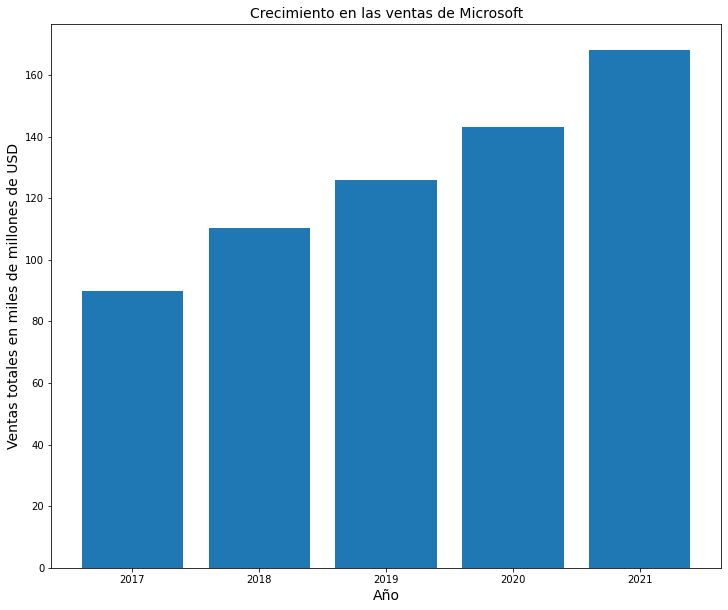

In [12]:
df[["revenue", "costOfRevenue"]] = df[["revenue", "costOfRevenue"]] / 1000000000


plt.bar(df['Year'], df['revenue'])

plt.title('Crecimiento en las ventas de Microsoft', fontsize=14)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Ventas totales en miles de millones de USD', fontsize=14)
plt.xticks(df['Year'],['2017', '2018', '2019', '2020', '2021'])

plt.show()

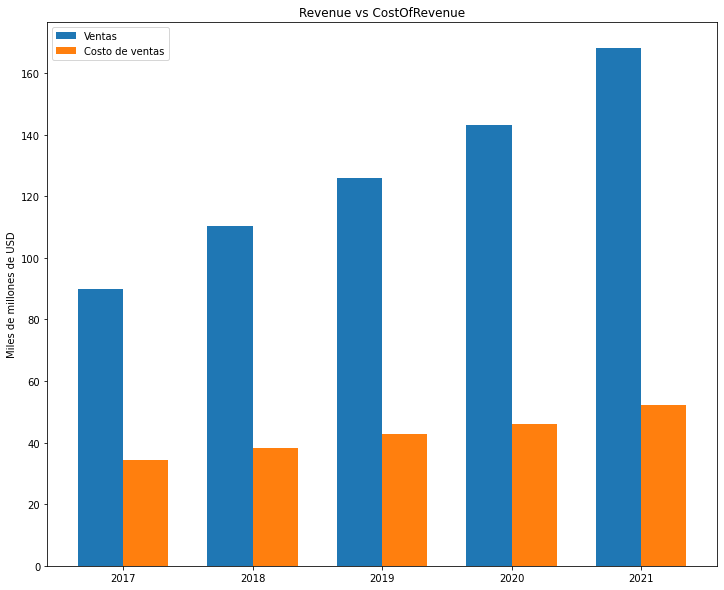

In [13]:
descripcion = ['2017', '2018', '2019', '2020', '2021']
revenue = df["revenue"]
costOfRevenue = df["costOfRevenue"]


### Recorriendo la descripcion

x = np.arange(len(descripcion)) 
width = 0.35  


### Configurando los plots

fig, ax = plt.subplots()
plot1 = ax.bar(x - width/2, revenue, width, label='Ventas')
plot2 = ax.bar(x + width/2, costOfRevenue, width, label='Costo de ventas')


### Añadiendo la descripcion

ax.set_ylabel('Miles de millones de USD')
ax.set_title('Revenue vs CostOfRevenue')
ax.set_xticks(x)
ax.set_xticklabels(descripcion)
ax.legend()



plt.show()